In [7]:
import shutil

# Specify the source folder path on your local machine
source_folder = r'E:\Brain Tumor data'

# Specify the destination folder path in Jupyter Notebook
destination_folder = './Brain Tumors Project'

# Copy the entire folder to the destination
shutil.copytree(source_folder, destination_folder, dirs_exist_ok=True)

'./Brain Tumors Project'

## Brain Tumors Classification Using Transfer Learning

In [1]:
import os
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_path = r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\bt_images'

# Construct full paths for the pickle files
training_data_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\training_data.pickle')
labels_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\labels.pickle')
test_data_path = os.path.join(data_path, r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\test_images-20210704T210303Z-001\test_images')

# Load the pickle files
with open(training_data_path, 'rb') as training_data_file:
    training_data = pickle.load(training_data_file)

with open(labels_path, 'rb') as labels_file:
    labels = pickle.load(labels_file)

In [3]:
from PIL import Image

# Open an image
image_path = r'C:\Users\SaWa\Brain Tumors\Brain Tumors Data\brain_tumor_mri\new_dataset\bt_images\1.jpg'
img = Image.open(image_path)

# Get the dimensions (width and height) of the image
width, height = img.size

print("Image Width:", width)
print("Image Height:", height)

Image Width: 512
Image Height: 512


In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Convert to NumPy arrays and normalize.
training_data = np.array(training_data)
labels = np.array(labels)


C:\Users\SaWa\AppData\Local\Temp\ipykernel_1920\1625702251.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  training_data = np.array(training_data)


In [5]:
training_data.shape

(3064, 2)

In [6]:
labels.shape

(3064,)

In [7]:
unique_labels = np.unique(labels)
print("Unique Label Values:", unique_labels)

Unique Label Values: [1 2 3]


In [8]:
# Subtract 1 from each label to make them start from 0
adjusted_labels = labels - 1

In [9]:
unique_labels1 = np.unique(adjusted_labels)
print("Unique Label Values:", unique_labels1)

Unique Label Values: [0 1 2]


In [10]:
# Get a list of all files in the folder
file_list = os.listdir(data_path)

In [11]:
# Filter out only image files (e.g., JPG, PNG, etc.)
image_files = [file for file in file_list if file.lower().endswith(('.jpg', '.png', '.jpeg'))]

In [12]:
# List to store processed image data
image_data = []

for image_file in image_files:
    image_path = os.path.join(data_path, image_file)
    img = Image.open(image_path)
    
    # Convert to RGB format if not already
    img = img.convert('RGB')
    
    # Resize the image to the desired dimensions
    img = img.resize((224, 224))
    
    # Convert to NumPy array
    img_array = np.array(img)
    
    # Normalize pixel values and convert to NumPy array
    img_array = np.array(img) / 255.0  
    
    # Append the processed image array to the list
    image_data.append(img_array)

In [13]:
# Convert the list of processed image arrays to a NumPy array
images_array = np.array(image_data)

In [14]:
del image_data

In [15]:
# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, adjusted_labels, test_size=0.2, random_state=42)

In [16]:
num_classes = len(np.unique(adjusted_labels))
num_classes

3

In [17]:
# Convert labels to categorical format
num_classes = len(np.unique(adjusted_labels))
train_labels_categorical = to_categorical(train_labels, num_classes=num_classes)
test_labels_categorical = to_categorical(test_labels, num_classes=num_classes)

In [18]:
# Load the pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

In [19]:
# Create your own model on top of the VGG16 base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Print a summary of the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 21,138,243
Trainable params: 21,138,243
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Train the model
history = model.fit(train_images, train_labels_categorical, batch_size=32, epochs=15, validation_split=0.1)

Epoch 1/15
69/69 [==============================] - 1173s 17s/step - loss: 0.8156 - accuracy: 0.6281 - val_loss: 0.4824 - val_accuracy: 0.8171
Epoch 2/15
69/69 [==============================] - 1147s 17s/step - loss: 0.5541 - accuracy: 0.7651 - val_loss: 0.5447 - val_accuracy: 0.7602
Epoch 3/15
69/69 [==============================] - 1156s 17s/step - loss: 0.4933 - accuracy: 0.7941 - val_loss: 0.4522 - val_accuracy: 0.8089
Epoch 4/15
69/69 [==============================] - 1150s 17s/step - loss: 0.4276 - accuracy: 0.8295 - val_loss: 0.4337 - val_accuracy: 0.8252
Epoch 5/15
69/69 [==============================] - 1174s 17s/step - loss: 0.4000 - accuracy: 0.8249 - val_loss: 0.3936 - val_accuracy: 0.8455
Epoch 6/15
69/69 [==============================] - 1177s 17s/step - loss: 0.3427 - accuracy: 0.8531 - val_loss: 0.4757 - val_accuracy: 0.7927
Epoch 7/15
69/69 [==============================] - 1185s 17s/step - loss: 0.2823 - accuracy: 0.8884 - val_loss: 0.5046 - val_accuracy: 0.8374

In [23]:
# Save the trained model
model.save('TransferLearning_BrainTumors.h5')

In [24]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels_categorical)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

20/20 [==============================] - 90s 5s/step - loss: 0.3450 - accuracy: 0.8923
Test Loss: 0.34501293301582336
Test Accuracy: 0.8923327922821045


### Evaluation using confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming you have predictions from your model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to labels

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = np.argmax(test_labels_categorical, axis=1)

# Generate confusion matrix
confusion = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(confusion)

20/20 [==============================] - 92s 5s/step
Confusion Matrix:
[[140   8  13]
 [  8 231  30]
 [  2   5 176]]


### Evaluation using area under the curve

In [26]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions from your model
predictions = model.predict(test_images)

# Assuming test_labels_categorical contains the true labels in one-hot encoded format
true_labels = test_labels_categorical[:, 1]  # Assuming the positive class is index 1

# Calculate AUC
auc = roc_auc_score(true_labels, predictions[:, 1])  # Assuming the positive class is index 1

# Print AUC and test accuracy
print("AUC:", auc)
print("Test accuracy:", test_accuracy)

20/20 [==============================] - 90s 5s/step
AUC: 0.9768954785164693
Test accuracy: 0.8923327922821045


### Graph for loss and accuracy

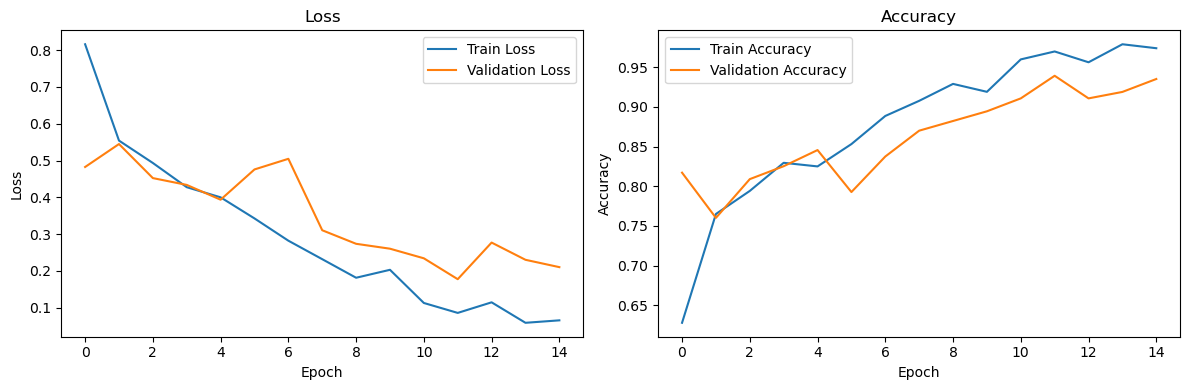

In [27]:
import matplotlib.pyplot as plt 

# Get training history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Calculate Confidence

In [28]:
# Get the maximum probability for each prediction
max_probabilities = np.max(predictions, axis=1)

# Print the confidence scores for the first few test images
for i in range(len(max_probabilities)):
    print(f"Test Image {i + 1} - Confidence: {max_probabilities[i]:.4f}")

Test Image 1 - Confidence: 1.0000
Test Image 2 - Confidence: 1.0000
Test Image 3 - Confidence: 1.0000
Test Image 4 - Confidence: 1.0000
Test Image 5 - Confidence: 0.9994
Test Image 6 - Confidence: 0.9997
Test Image 7 - Confidence: 1.0000
Test Image 8 - Confidence: 0.9999
Test Image 9 - Confidence: 0.9762
Test Image 10 - Confidence: 1.0000
Test Image 11 - Confidence: 0.9529
Test Image 12 - Confidence: 0.9995
Test Image 13 - Confidence: 0.7699
Test Image 14 - Confidence: 1.0000
Test Image 15 - Confidence: 0.6141
Test Image 16 - Confidence: 0.9987
Test Image 17 - Confidence: 0.5797
Test Image 18 - Confidence: 0.9999
Test Image 19 - Confidence: 1.0000
Test Image 20 - Confidence: 1.0000
Test Image 21 - Confidence: 1.0000
Test Image 22 - Confidence: 0.7598
Test Image 23 - Confidence: 0.9996
Test Image 24 - Confidence: 1.0000
Test Image 25 - Confidence: 0.9960
Test Image 26 - Confidence: 0.9819
Test Image 27 - Confidence: 1.0000
Test Image 28 - Confidence: 0.9274
Test Image 29 - Confidence: 1